

# Functions



In [ ]:
def hypothesis_testing_regression(x, y, b1, res_square):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis :       β1 = 0 (No effect on dependent variable)")
    print("Alternate Hypothesis :  β1 ≠ 0")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    Sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals =", Sum_of_residual_sq)

    mean = np.mean(x)
    Mse = Sum_of_residual_sq / (n - 2)
    print("Mean of x =", mean)
    print("Mean Squared Error (MSE) =", Mse)
    print("Root Mean Squared Error (RMSE) =", np.sqrt(Mse))

    s = (x - mean) ** 2
    a = s.sum()
    b = np.sqrt(a)
    Sb1 = np.sqrt(Mse) / b

    # Step 4: Calculate a test statistic
    print("4. Step 4")
    t_Statistics = b1 / Sb1
    print("The value of t-statistics =", t_Statistics)

    # Step 5: Construct Acceptance / Rejection regions
    print("5. Step 5")
    # Degrees of freedom
    df = n - 2

    # Calculate p-value
    p_value = 2 * (1 - t.cdf(abs(t_Statistics), df))
    print("p-value:", p_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    print("6. Step 6")
    if p_value < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis")

# Example usage
# x =  Independent variable
# y = np.array([10, 12, 14, 16, 18])   # Dependent variable
#b1 = 1.5
#res_square = np.array([0.2, 0.3, 0.4, 0.5, 0.6])

#hpothesis_testing_regression(x, y, b1, res_square)


omnibus

In [ ]:
def omnibus_test_regression(x, y, res_square, k):
    n = len(x)

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)")
    print("Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    Sum_of_residual_sq = np.sum(res_square)
    print("Sum of Squared Residuals =", Sum_of_residual_sq)

    mean = np.mean(x)
    Mse = Sum_of_residual_sq / (n - k - 1)
    print("Mean Squared Error (MSE) =", Mse)
    print("Root Mean Squared Error (RMSE) =", np.sqrt(Mse))

    s = (x - mean) ** 2
    a = s.sum()
    b = np.sqrt(a)

    # Step 4: Calculate the F-statistic
    print("4. Step 4")
    SSR = np.sum((y - np.mean(y)) ** 2) - Sum_of_residual_sq
    MSR = SSR / k
    F_statistic = MSR / Mse
    print("The value of F-statistic =", F_statistic)

    # Step 5: Construct Acceptance / Rejection regions
    print("5. Step 5")
    # Degrees of freedom
    df1 = k
    df2 = n - k - 1

    # Calculate p-value
    p_value = 1 - f.cdf(F_statistic, df1, df2)
    print("p-value:", p_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    print("6. Step 6")
    if p_value < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject Null Hypothesis")

# # Example usage
# x = np.array([20, 22, 24, 26, 28])  # Independent variable
# y = np.array([10, 12, 14, 16, 18])   # Dependent variable
# res_square = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
# k = 1  # Number of independent variables

# omnibus_test_regression(x, y, res_square, k)


# Assi4

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import t,f,normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ames_housing_data (1).xlsx - ames_housing_data.csv')
df

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Sampling

In [ ]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Lower whisker value: 12789.0
Upper whisker value: 338931.0


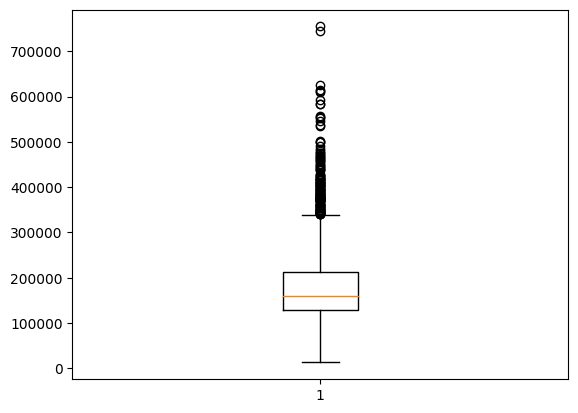

In [ ]:
boxplot= plt.boxplot(df['SalePrice'])


# Extracting whisker values
whisker_values = [item.get_ydata()[1] for item in boxplot['whiskers']]

# Printing whisker values
print("Lower whisker value:", whisker_values[0])
print("Upper whisker value:", whisker_values[1])
plt.show()

In [ ]:
df[df['SalePrice'] < 335000.0]

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
data = df[df['SalePrice'] < 335000]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SID            2782 non-null   int64  
 1   PID            2782 non-null   int64  
 2   SubClass       2782 non-null   int64  
 3   Zoning         2782 non-null   object 
 4   LotFrontage    2297 non-null   float64
 5   LotArea        2782 non-null   int64  
 6   Street         2782 non-null   object 
 7   Alley          197 non-null    object 
 8   LotShape       2782 non-null   object 
 9   LandContour    2782 non-null   object 
 10  Utilities      2782 non-null   object 
 11  LotConfig      2782 non-null   object 
 12  LandSlope      2782 non-null   object 
 13  Neighborhood   2782 non-null   object 
 14  Condition1     2782 non-null   object 
 15  Condition2     2782 non-null   object 
 16  BldgType       2782 non-null   object 
 17  HouseStyle     2782 non-null   object 
 18  OverallQual  

In [ ]:
data.drop(columns =['PoolQC','Fence','PoolQC','FireplaceQu','Alley','MiscFeature','MasVnrType'], inplace = True) #due to insufficient data in the columns

<ipython-input-217-493d7a206a18>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


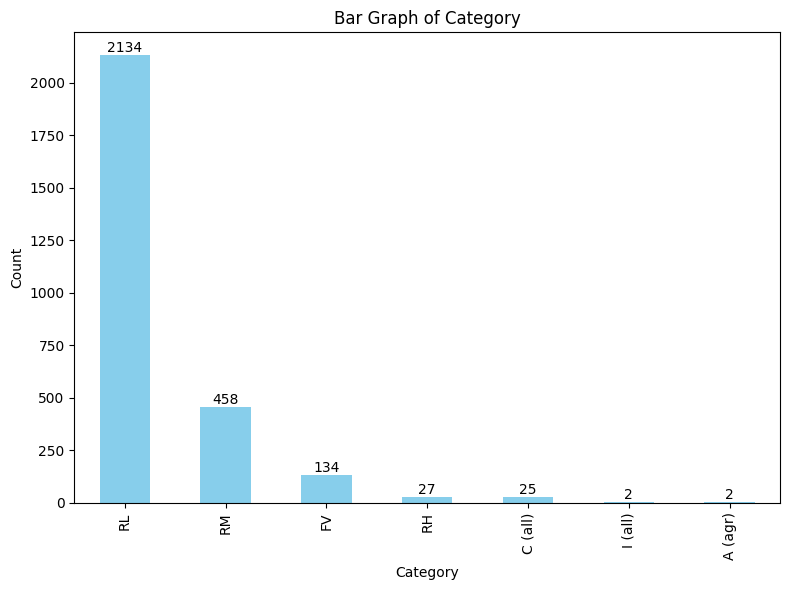

In [ ]:
# Count the occurrences of each category in the 'Category' column
value_counts = data['Zoning'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Graph of Category')

# Add count values on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data = data[data['Zoning'].isin(['RL', 'RH', 'RM'])]  #Keeping only residential in Zoning (drop condition)


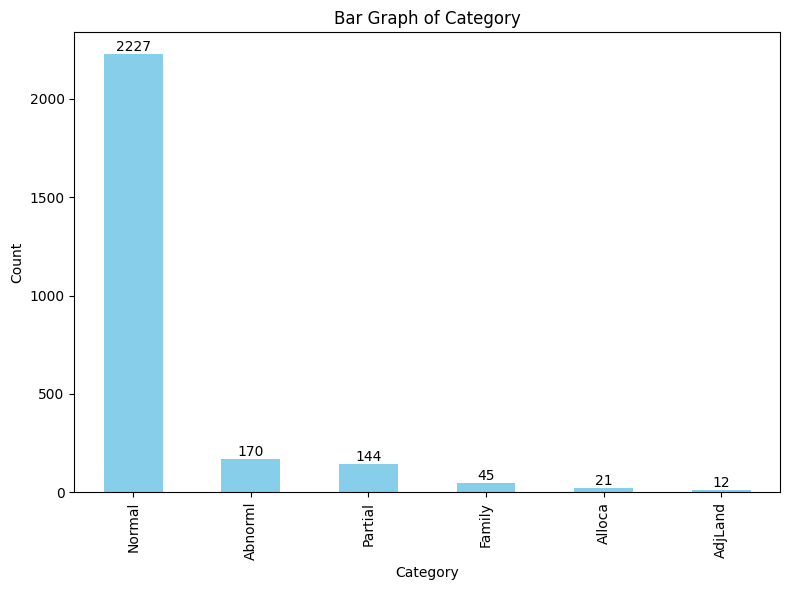

In [ ]:
# Count the occurrences of each category in the 'Category' column
value_counts = data['SaleCondition'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Graph of Category')

# Add count values on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data = data[data['SaleCondition'].isin(['Normal'])]  #Keeping only Normal SaleCondition (drop condition)


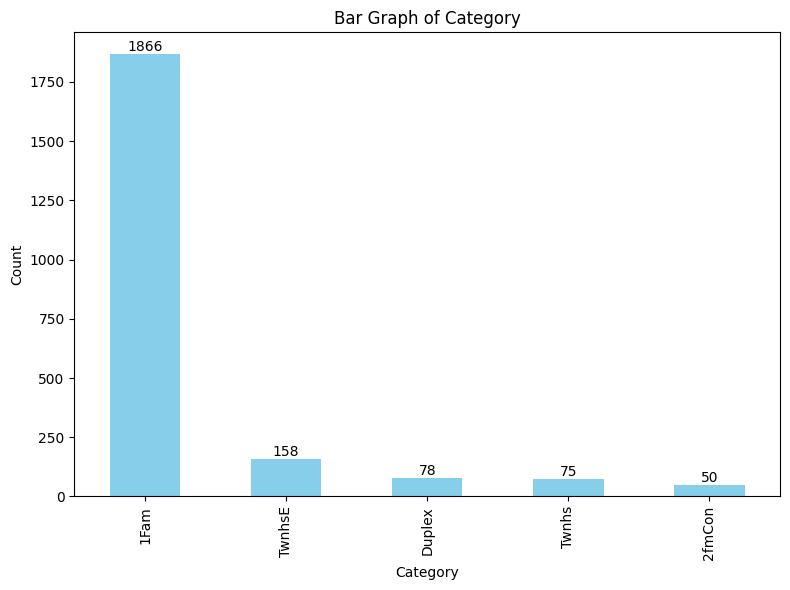

In [ ]:
# Count the occurrences of each category in the 'Category' column
value_counts = data['BldgType'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Graph of Category')

# Add count values on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data = data[data['BldgType'].isin(['1Fam'])]  #Keeping only one family in BldgType (drop condition)


In [ ]:
data.columns

Index(['SID', 'PID', 'SubClass', 'Zoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodel', 'RoofStyle',
       'RoofMat', 'Exterior1', 'Exterior2', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'En

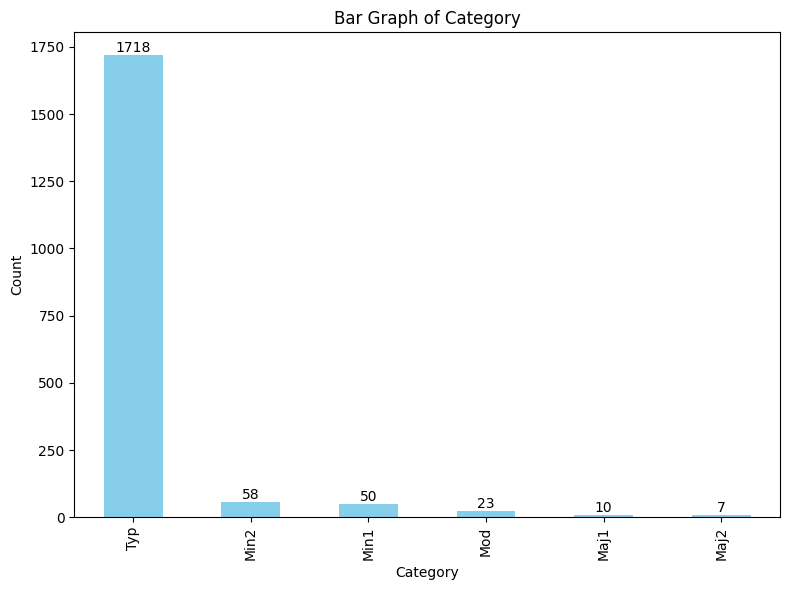

In [ ]:
# Count the occurrences of each category in the 'Category' column
value_counts = data['Functional'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Graph of Category')

# Add count values on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data = data[data['Functional'].isin(['Typ'])]  #Keeping only typical functionality (drop condition)


In [ ]:
data

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


# handling missing

In [ ]:
import numpy as np
columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss ))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)


# for feature in columns_with_miss:
#     print(feature, np.round(df[feature].isnull().mean(), 4))

Columns with missing values: 15


LotFrontage     345
GarageType       61
GarageYrBlt      61
GarageFinish     61
GarageQual       61
GarageCond       61
BsmtExposure     24
BsmtFinType2     23
BsmtQual         22
BsmtCond         22
BsmtFinType1     22
MasVnrArea        9
Electrical        1
BsmtFullBath      1
BsmtHalfBath      1
dtype: int64

## Missing %age in numerical

In [ ]:
numerical_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0 and data[feature].dtype in ['int', 'float']]

# Count the number of missing values and calculate the percentage of missing values for each numerical feature
missing_value_info = {}
for feature in numerical_with_na:
    missing_count = data[feature].isnull().sum()
    missing_percentage = (missing_count / len(data)) * 100
    missing_value_info[feature] = {'count': missing_count, 'percentage': missing_percentage}

# Print the missing value information for each numerical feature
for feature, info in missing_value_info.items():
    print(f"Feature: {feature}, Missing Count: {info['count']}, Missing Percentage: {info['percentage']:.2f}%")


Feature: LotFrontage, Missing Count: 345, Missing Percentage: 20.08%
Feature: MasVnrArea, Missing Count: 9, Missing Percentage: 0.52%
Feature: BsmtFullBath, Missing Count: 1, Missing Percentage: 0.06%
Feature: BsmtHalfBath, Missing Count: 1, Missing Percentage: 0.06%
Feature: GarageYrBlt, Missing Count: 61, Missing Percentage: 3.55%


## Handling missing with less count(1)

In [ ]:
missing_rows = data[data['Electrical'].isnull()]
missing_rows

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1577,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [ ]:
data['Electrical'].value_counts()

Electrical
SBrkr    1569
FuseA     121
FuseF      25
FuseP       2
Name: count, dtype: int64

In [ ]:
mode_value = data['Electrical'].mode()[0]
data['Electrical'].fillna(mode_value, inplace=True)


In [ ]:
# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the value in 'ColumnName' is missing
    if pd.isnull(row['Electrical']):
        # Print the index, column name, and value where the missing value is found
        print(f"Missing value in row {index}, column 'Electrical', value: {row['Electrical']}")

In [ ]:
columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss ))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)


# for feature in columns_with_miss:
#     print(feature, np.round(df[feature].isnull().mean(), 4))

Columns with missing values: 14


LotFrontage     345
GarageType       61
GarageYrBlt      61
GarageFinish     61
GarageQual       61
GarageCond       61
BsmtExposure     24
BsmtFinType2     23
BsmtQual         22
BsmtCond         22
BsmtFinType1     22
MasVnrArea        9
BsmtFullBath      1
BsmtHalfBath      1
dtype: int64

In [ ]:
data['BsmtFullBath'].value_counts()

BsmtFullBath
0.0    1025
1.0     688
2.0       4
Name: count, dtype: int64

In [ ]:
# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the value in 'ColumnName' is missing
    if pd.isnull(row['BsmtFullBath']):
        # Print the index, column name, and value where the missing value is found
        print(f"Missing value in row {index}, column 'BsmtFullBath', value: {row['BsmtFullBath']}")

Missing value in row 1497, column 'BsmtFullBath', value: nan


In [ ]:
missing_rows = data[data['BsmtFullBath'].isnull()]
missing_rows

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1497,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2008,WD,Normal,284700


In [ ]:
mode_value = data['BsmtFullBath'].mode()[0]
data['BsmtFullBath'].fillna(mode_value, inplace=True)


In [ ]:
data['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    1594
1.0     123
Name: count, dtype: int64

In [ ]:
mode_value = data['BsmtHalfBath'].mode()[0]
data['BsmtHalfBath'].fillna(mode_value, inplace=True)


In [ ]:
columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss ))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)


# for feature in columns_with_miss:
#     print(feature, np.round(df[feature].isnull().mean(), 4))

Columns with missing values: 12


LotFrontage     345
GarageType       61
GarageYrBlt      61
GarageFinish     61
GarageQual       61
GarageCond       61
BsmtExposure     24
BsmtFinType2     23
BsmtQual         22
BsmtCond         22
BsmtFinType1     22
MasVnrArea        9
dtype: int64

## missing in MasVnrArea

In [ ]:
data['MasVnrArea'].describe()

count    1709.000000
mean       82.816267
std       146.913910
min         0.000000
25%         0.000000
50%         0.000000
75%       132.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

In [ ]:
data['MasVnrArea'].mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [ ]:
data[data['MasVnrArea'].isnull()]

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
55,56,528240070,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,216500
484,485,528275160,60,RL,NaN,12891,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2009,WD,Normal,257500
538,539,531371050,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2009,WD,Normal,184900
867,868,907260030,60,RL,70.0,8749,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,11,2009,WD,Normal,198500
1095,1096,528290090,60,RL,NaN,7750,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2008,WD,Normal,176000
1119,1120,528439010,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2008,WD,Normal,247000
1454,1455,907251090,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,3,2008,WD,Normal,237000
1751,1752,528250010,80,RL,NaN,11950,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,10,2007,WD,Normal,165500
2823,2824,908130020,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,117250


In [ ]:
mode_value = data['MasVnrArea'].mode()[0]
data['MasVnrArea'].fillna(mode_value, inplace=True)


In [ ]:
columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss ))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)


# for feature in columns_with_miss:
#     print(feature, np.round(df[feature].isnull().mean(), 4))

Columns with missing values: 11


LotFrontage     345
GarageType       61
GarageYrBlt      61
GarageFinish     61
GarageQual       61
GarageCond       61
BsmtExposure     24
BsmtFinType2     23
BsmtQual         22
BsmtCond         22
BsmtFinType1     22
dtype: int64

## Missing in Lotfrontage

In [ ]:
data[data['LotFrontage'].isnull()][0:10]

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,527165230,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,...,0,0,0,0,500,3,2010,WD,Normal,185000
23,24,527402200,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,527402250,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,149900
55,56,528240070,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,216500
57,58,528250100,80,RL,NaN,7750,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,180000
58,59,528292020,60,RL,NaN,9505,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,222500
74,75,531380080,60,RL,NaN,8880,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,205000
79,80,531452180,60,RL,NaN,9453,Pave,IR1,Lvl,AllPub,...,0,238,0,0,0,2,2010,WD,Normal,194500
86,87,532377060,20,RL,NaN,9819,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,122000
88,89,532378110,20,RL,NaN,6897,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,127000


In [ ]:
data[data['LotFrontage'].isnull()]['SalePrice'].mean()

185439.68695652173

In [ ]:
data['LotFrontage'].describe()

count    1373.000000
mean       71.455208
std        18.583365
min        30.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
data['LotFrontage'].median()

70.0

In [ ]:
data['LotFrontage'].mode()

0    60.0
Name: LotFrontage, dtype: float64

In [ ]:
mean_value = data['LotFrontage'].mean()
data['LotFrontage'].fillna(mean_value, inplace=True)


In [ ]:
columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss ))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)


# for feature in columns_with_miss:
#     print(feature, np.round(df[feature].isnull().mean(), 4))

Columns with missing values: 10


GarageType      61
GarageYrBlt     61
GarageFinish    61
GarageQual      61
GarageCond      61
BsmtExposure    24
BsmtFinType2    23
BsmtQual        22
BsmtCond        22
BsmtFinType1    22
dtype: int64

## separating data

In [ ]:
data.columns

Index(['SID', 'PID', 'SubClass', 'Zoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodel', 'RoofStyle',
       'RoofMat', 'Exterior1', 'Exterior2', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'En

In [ ]:
data1= data.copy()

In [ ]:
columns_to_drop =['SID','PID','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']

# Assuming 'data' is your dataset and 'columns_to_drop' is a list of column names to be dropped
columns_to_keep = [col for col in data1.columns if col not in columns_to_drop]

# Create a new DataFrame with only the desired columns
data1 = data1[columns_to_keep]

In [ ]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1718 entries, 0 to 2929
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SubClass       1718 non-null   int64  
 1   Zoning         1718 non-null   object 
 2   LotFrontage    1718 non-null   float64
 3   LotArea        1718 non-null   int64  
 4   Street         1718 non-null   object 
 5   LotShape       1718 non-null   object 
 6   LandContour    1718 non-null   object 
 7   Utilities      1718 non-null   object 
 8   LotConfig      1718 non-null   object 
 9   LandSlope      1718 non-null   object 
 10  Neighborhood   1718 non-null   object 
 11  Condition1     1718 non-null   object 
 12  Condition2     1718 non-null   object 
 13  BldgType       1718 non-null   object 
 14  HouseStyle     1718 non-null   object 
 15  OverallQual    1718 non-null   int64  
 16  OverallCond    1718 non-null   int64  
 17  YearBuilt      1718 non-null   int64  
 18  YearRemodel  

In [ ]:
columns_with_miss = data1.isnull().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss ))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)



Columns with missing values: 0


Series([], dtype: int64)

In [ ]:
data1

,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,71.455208,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


## Feature Engineering

In [ ]:
data1.insert(63,'HouseAge', data1['YrSold']-data1['YearBuilt'])


In [ ]:
data1.insert(64,'ConstArea', data1['GrLivArea'] + data1['TotalBsmtSF'])

In [ ]:
data1.insert(65,'Price_sqft', data1['SalePrice'] / data1['ConstArea'])

In [ ]:
data1.insert(66,'TotalFullBath', data1['BsmtFullBath'] + data1['FullBath'])



In [ ]:
data1.insert(67,'TotalHalfBath', data1['BsmtHalfBath'] + data1['HalfBath'])

In [ ]:
# data1.drop(columns=['YearBuilt','YrSold','GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'])


columns_to_drop =['YearBuilt','YrSold','GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath']
# Assuming 'data' is your dataset and 'columns_to_drop' is a list of column names to be dropped
columns_to_keep = [col for col in data1.columns if col not in columns_to_drop]

# Create a new DataFrame with only the desired columns
data1 = data1[columns_to_keep]

In [ ]:
data2= data1.reset_index()

# Task 1

In [ ]:
data2

,index,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,SaleType,SaleCondition,HouseAge,ConstArea,Price_sqft,TotalFullBath,TotalHalfBath,SalePrice
0,0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,5,WD,Normal,50,2736.0,78.581871,2.0,0.0,215000
1,1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,6,WD,Normal,49,1778.0,59.055118,1.0,0.0,105000
2,2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,...,12500,6,WD,Normal,52,2658.0,64.710309,1.0,1.0,172000
3,3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,4,WD,Normal,42,4220.0,57.819905,3.0,1.0,244000
4,4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,3,WD,Normal,13,2557.0,74.266719,2.0,1.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2925,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,3,WD,Normal,22,2006.0,71.036889,2.0,0.0,142500
1714,2926,20,RL,71.455208,8885,Pave,IR1,Low,AllPub,Inside,...,0,6,WD,Normal,23,1766.0,74.178935,2.0,0.0,131000
1715,2927,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,...,700,7,WD,Normal,14,1882.0,70.138151,1.0,1.0,132000
1716,2928,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,4,WD,Normal,32,2778.0,61.195104,2.0,0.0,170000


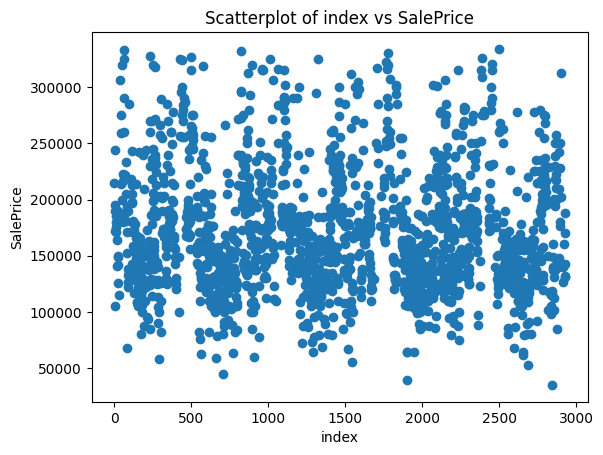

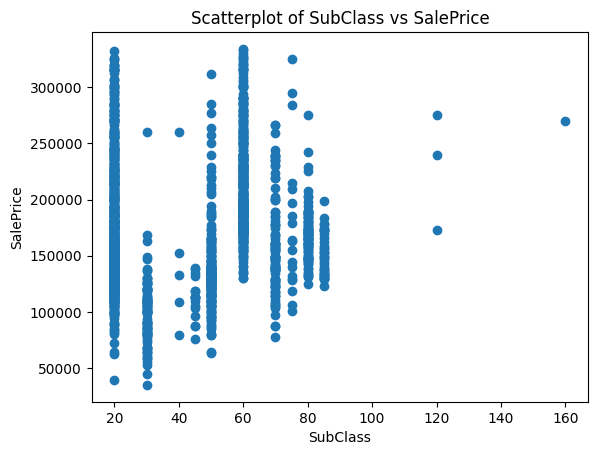

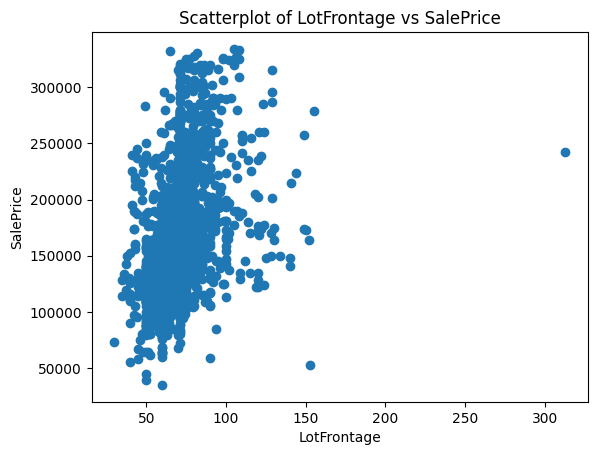

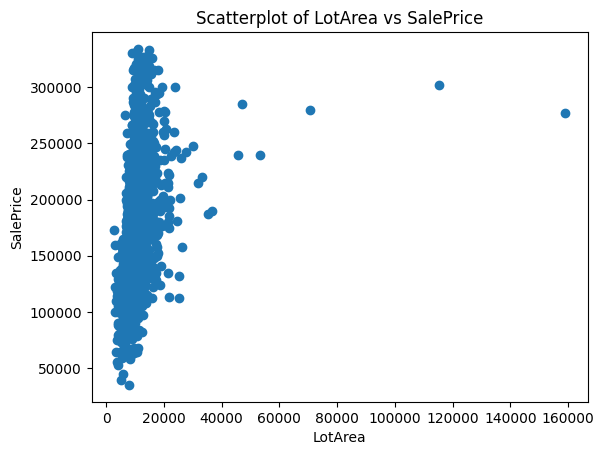

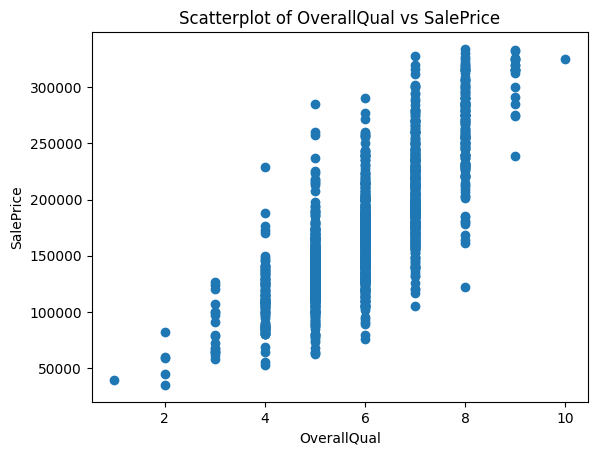

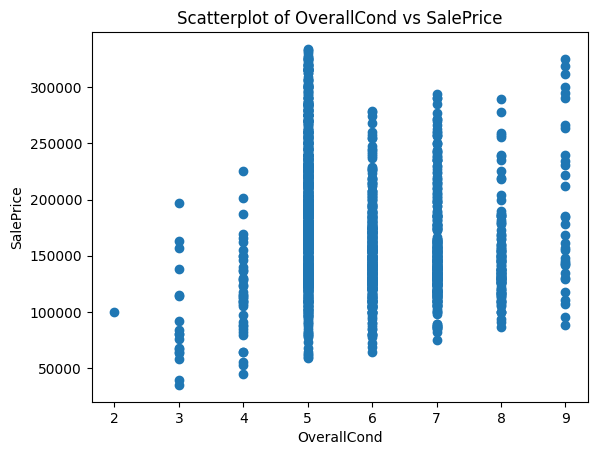

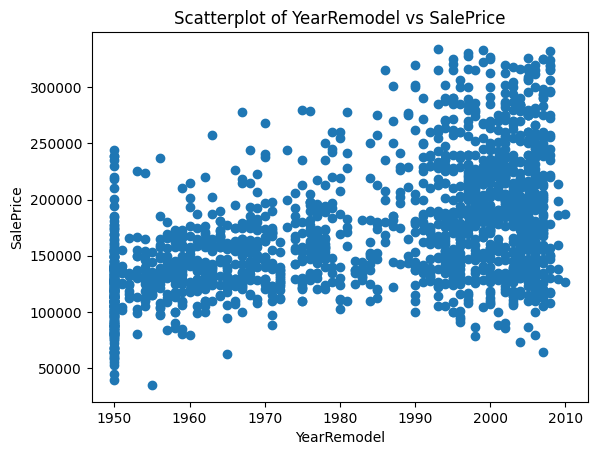

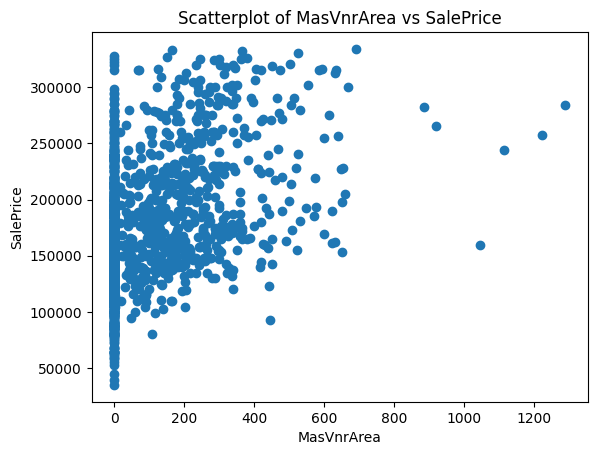

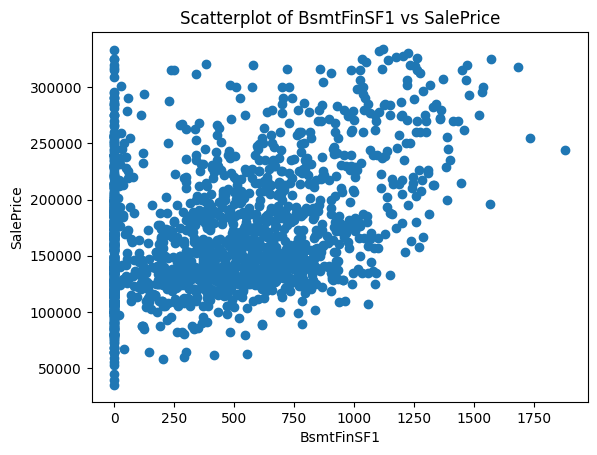

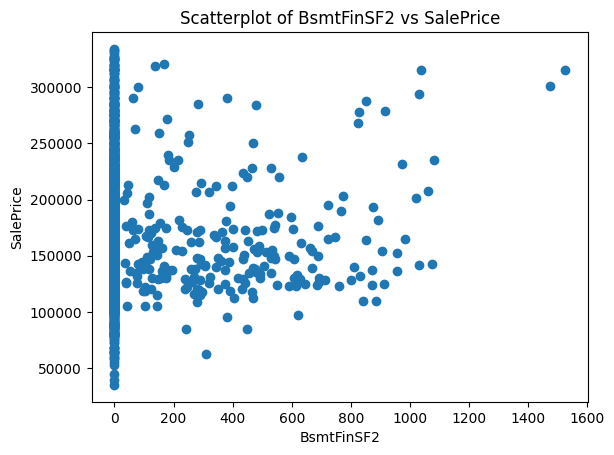

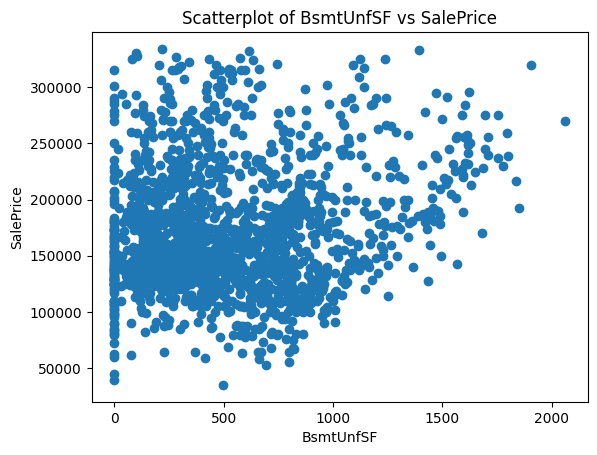

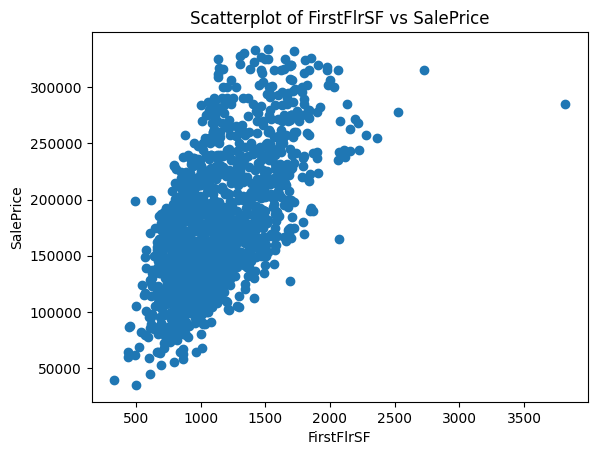

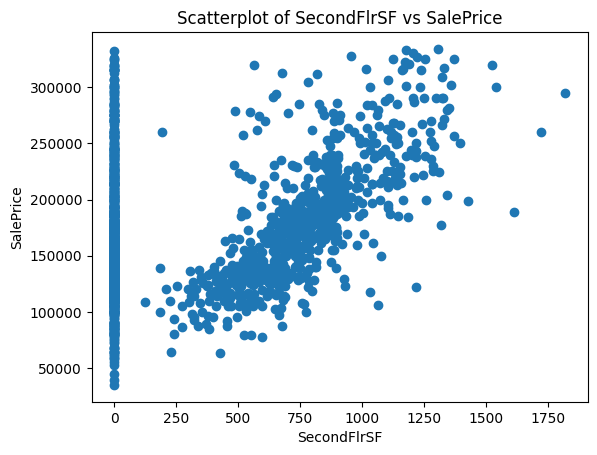

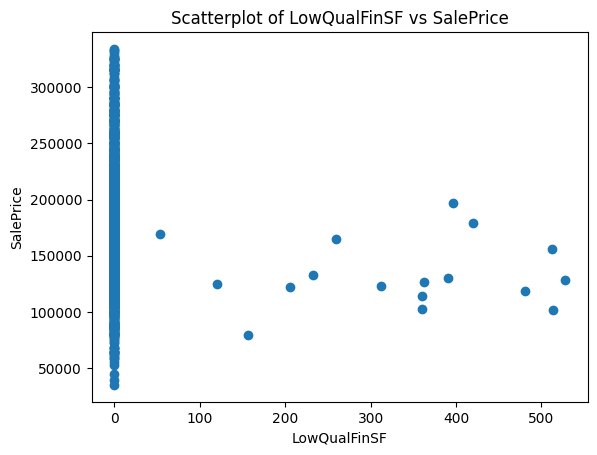

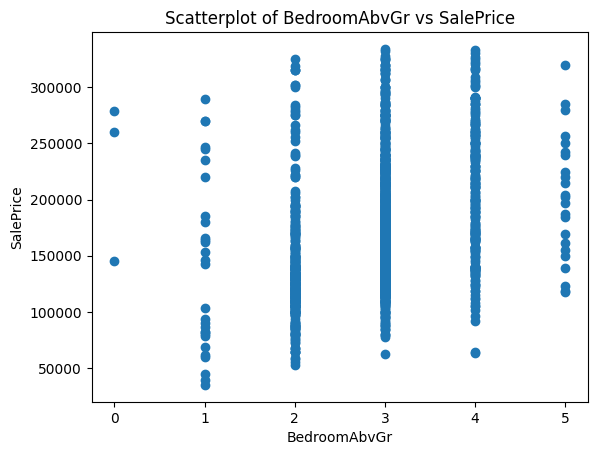

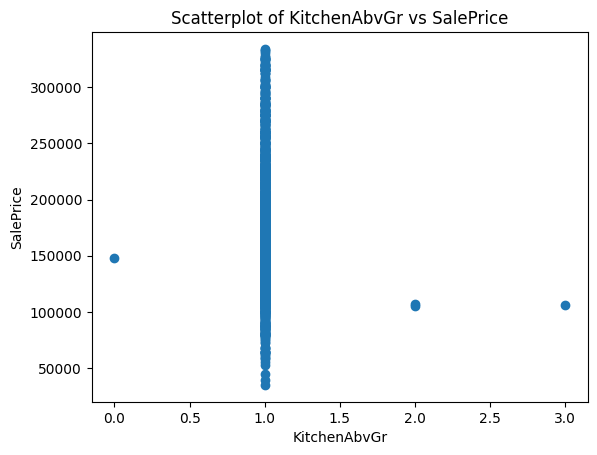

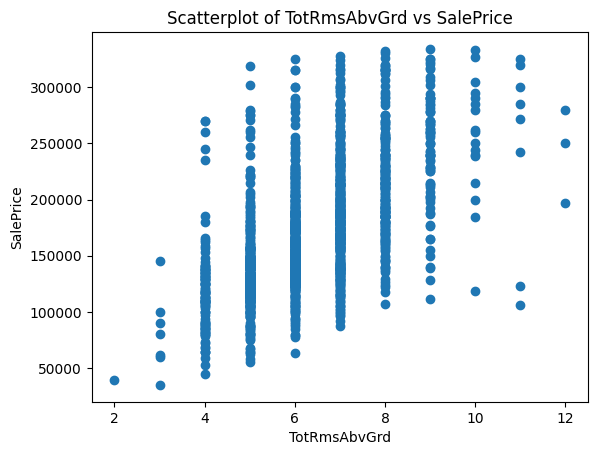

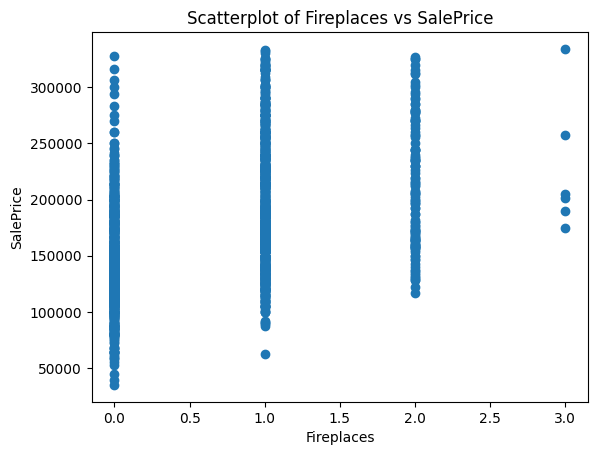

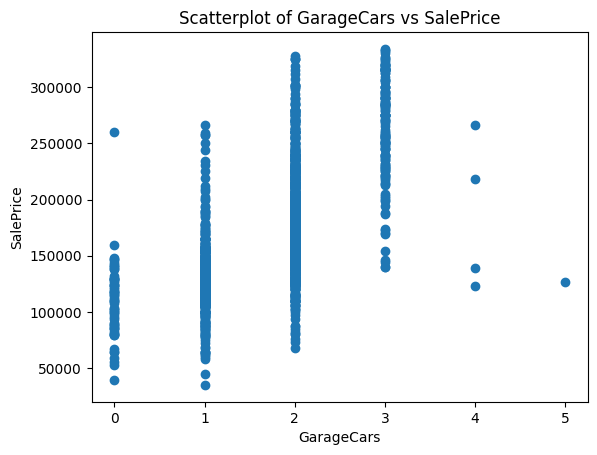

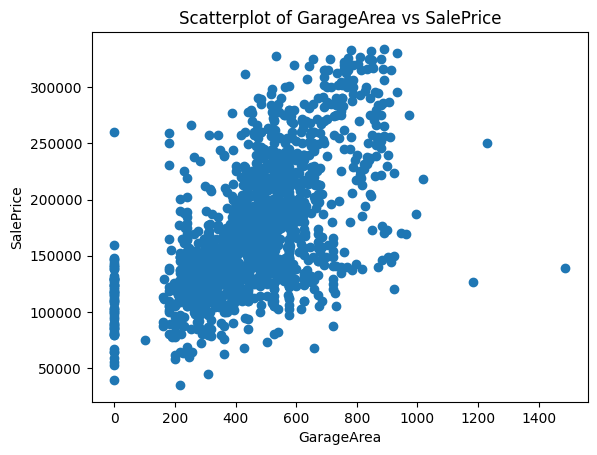

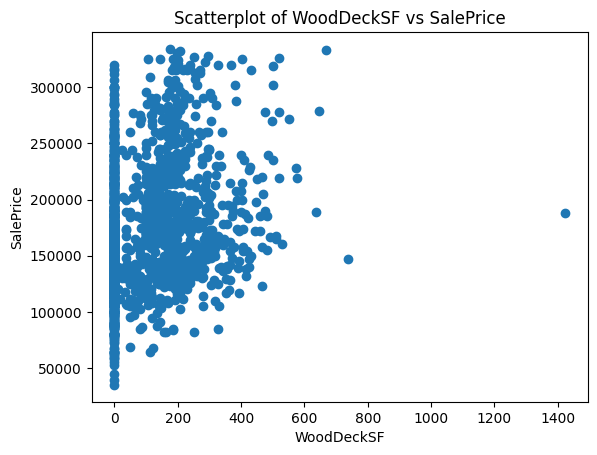

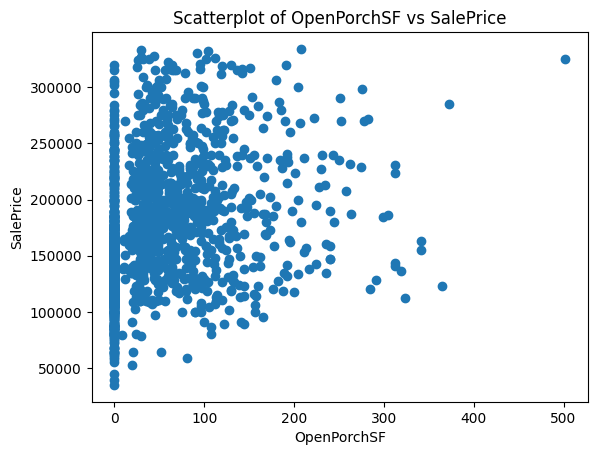

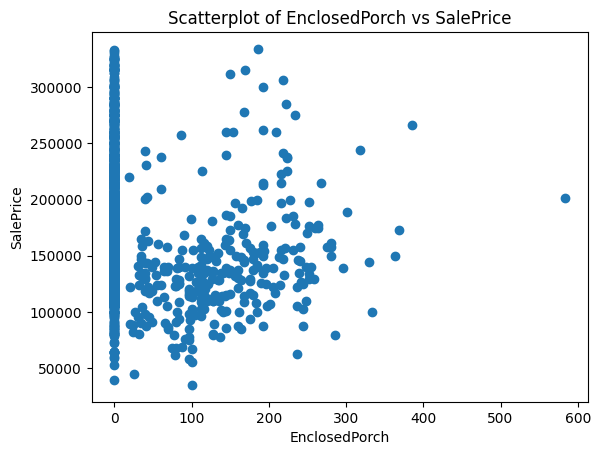

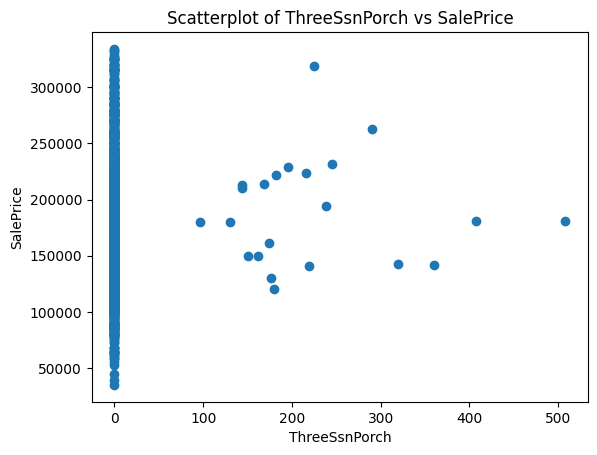

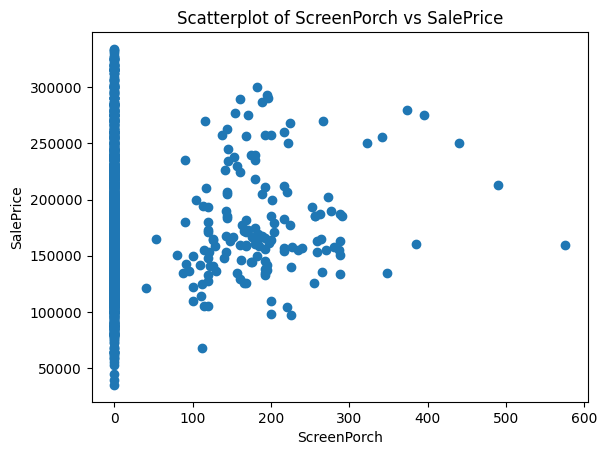

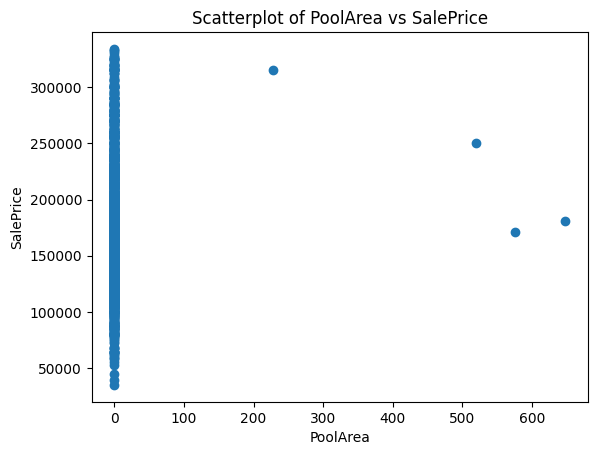

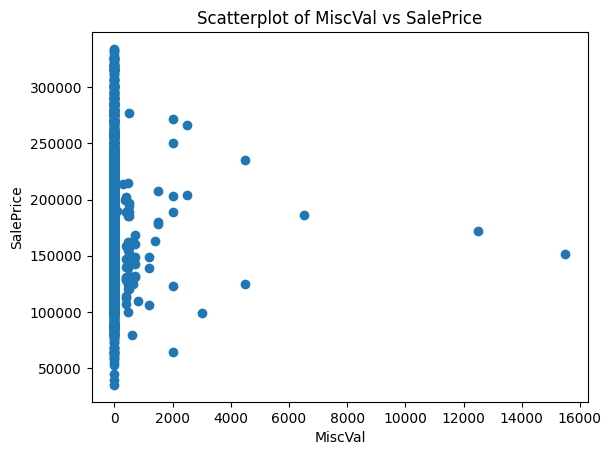

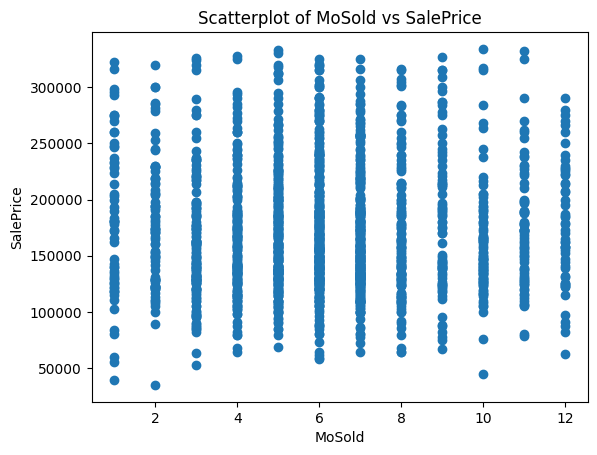

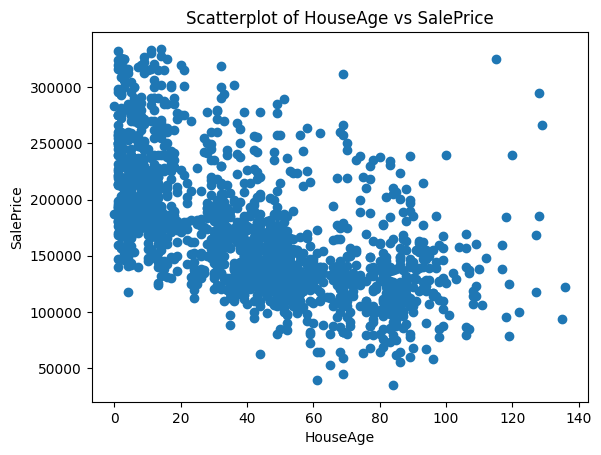

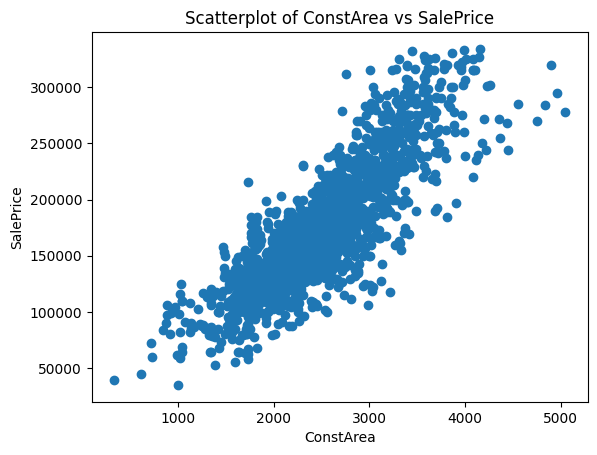

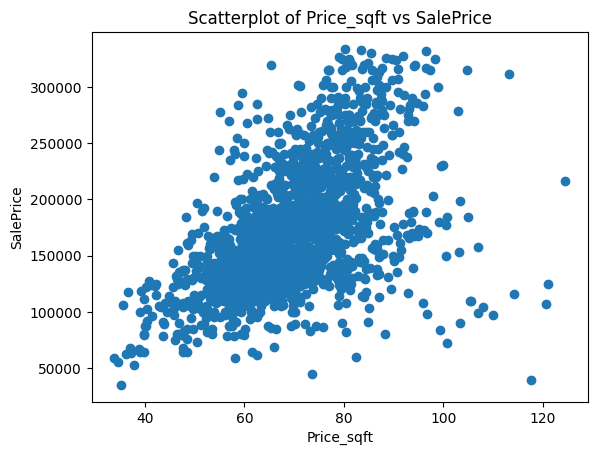

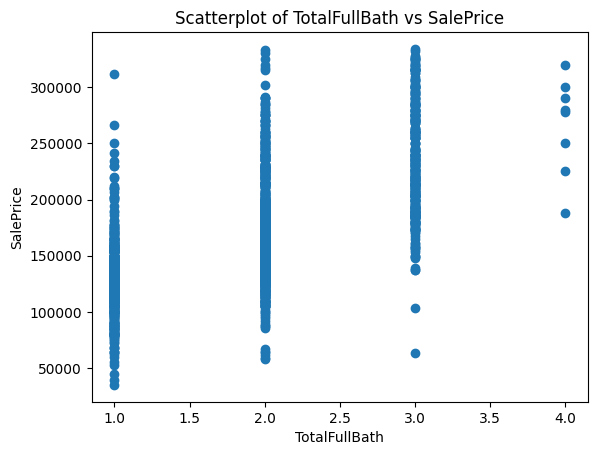

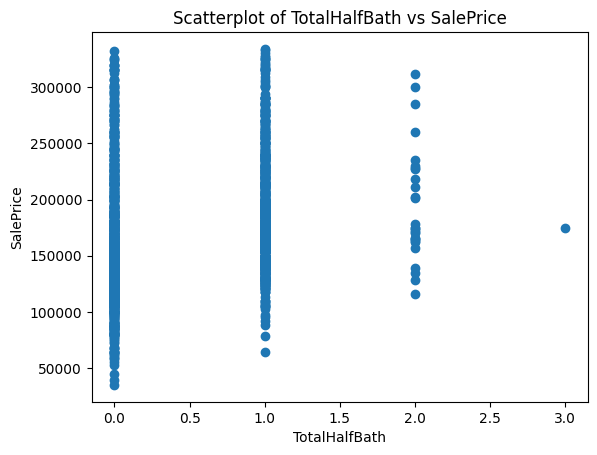

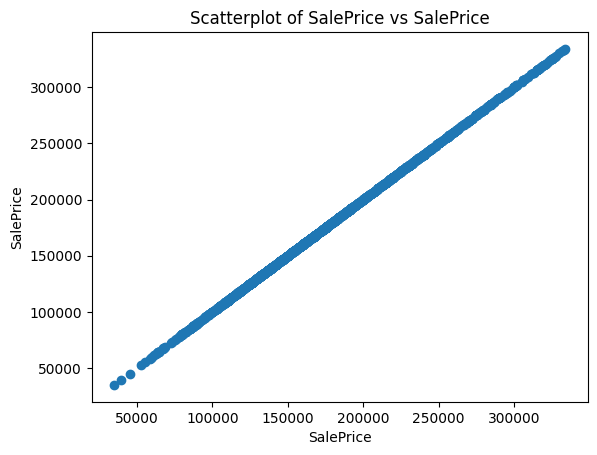

In [ ]:
# Assuming 'data2' is your dataset and 'target_variable' is your target variable
target_variable = data2['SalePrice']

# Get the numerical columns in the dataset
numerical_columns = data2.select_dtypes(include=['int', 'float']).columns

# Loop through each numerical column and draw a scatterplot
for column in numerical_columns:
    plt.scatter(x=data2[column], y=target_variable)
    plt.title(f'Scatterplot of {column} vs {target_variable.name}')
    plt.xlabel(column)
    plt.ylabel(target_variable.name)
    plt.show()

In [ ]:
data2

,index,SubClass,Zoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,SaleType,SaleCondition,HouseAge,ConstArea,Price_sqft,TotalFullBath,TotalHalfBath,SalePrice
0,0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,5,WD,Normal,50,2736.0,78.581871,2.0,0.0,215000
1,1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,6,WD,Normal,49,1778.0,59.055118,1.0,0.0,105000
2,2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,...,12500,6,WD,Normal,52,2658.0,64.710309,1.0,1.0,172000
3,3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,4,WD,Normal,42,4220.0,57.819905,3.0,1.0,244000
4,4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,3,WD,Normal,13,2557.0,74.266719,2.0,1.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2925,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,3,WD,Normal,22,2006.0,71.036889,2.0,0.0,142500
1714,2926,20,RL,71.455208,8885,Pave,IR1,Low,AllPub,Inside,...,0,6,WD,Normal,23,1766.0,74.178935,2.0,0.0,131000
1715,2927,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,...,700,7,WD,Normal,14,1882.0,70.138151,1.0,1.0,132000
1716,2928,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,4,WD,Normal,32,2778.0,61.195104,2.0,0.0,170000


In [ ]:
correlation_dict = {}

# Calculate correlation between each numerical feature and SalePrice
for column in data2.select_dtypes(include=['int', 'float']).columns:
    correlation = data2[column].corr(data2['SalePrice'])
    correlation_dict[column] = correlation

# Sort the correlation dictionary by values in descending order
sorted_correlation = sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted correlation values
for item in sorted_correlation:
    print(f'Correlation between {item[0]} and SalePrice is = {item[1]}')


Correlation between SalePrice and SalePrice is = 1.0
Correlation between ConstArea and SalePrice is = 0.8463473421066878
Correlation between OverallQual and SalePrice is = 0.789288008965684
Correlation between GarageCars and SalePrice is = 0.6545388921081666
Correlation between TotalFullBath and SalePrice is = 0.648721332044344
Correlation between GarageArea and SalePrice is = 0.6142656826048202
Correlation between TotRmsAbvGrd and SalePrice is = 0.6047014544433901
Correlation between FirstFlrSF and SalePrice is = 0.6009690809304085
Correlation between YearRemodel and SalePrice is = 0.5206367143064949
Correlation between Price_sqft and SalePrice is = 0.502410807077153
Correlation between Fireplaces and SalePrice is = 0.47727097032002985
Correlation between MasVnrArea and SalePrice is = 0.44236710610518554
Correlation between SecondFlrSF and SalePrice is = 0.38140950578664123
Correlation between BsmtFinSF1 and SalePrice is = 0.3539664348251966
Correlation between LotFrontage and SalePri

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X = data2['ConstArea']  # Add all your predictor variables here
Y= data2['SalePrice']

# Fit the multiple linear regression model
model = sm.OLS(Y, sm.add_constant(X)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model.summary())



# Print the regression equation
print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea".format(model.params['const'], model.params['ConstArea']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     4333.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:34:26   Log-Likelihood:                -20112.
No. Observations:                1718   AIC:                         4.023e+04
Df Residuals:                    1716   BIC:                         4.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6210.8762   2779.534     -2.235      0.0

In [ ]:
# Coefficients from the provided regression equation
b0 = -6210.8762
b1 = 72.2027

# Extract the required features from the dataset
ConstArea = data2['ConstArea']

# Calculate the predicted values using the regression equation
predicted_values = b0 + b1 * ConstArea

# Extract the actual values
actual_values = data2['SalePrice']

# Calculate the residuals
residuals = actual_values - predicted_values
res_square = residuals ** 2
sum_res_square1 = np.sum(res_square)

# Create a DataFrame to hold actual, predicted, and residual values
results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals, 'Res_Sqr': res_square})

# Print the actual, predicted, and residual values
print(results)

      Actual    Predicted    Residual       Res_Sqr
0     215000  191335.7110  23664.2890  5.599986e+08
1     105000  122165.5244 -17165.5244  2.946552e+08
2     172000  185703.9004 -13703.9004  1.877969e+08
3     244000  298484.5178 -54484.5178  2.968563e+09
4     189900  178411.4277  11488.5723  1.319873e+08
...      ...          ...         ...           ...
1713  142500  138627.7400   3872.2600  1.499440e+07
1714  131000  121299.0920   9700.9080  9.410762e+07
1715  132000  129674.6052   2325.3948  5.407461e+06
1716  170000  194368.2244 -24368.2244  5.938104e+08
1717  188000  210108.4130 -22108.4130  4.887819e+08

[1718 rows x 4 columns]


## a. Make a scatterplot of Y and X, and overlay the regression line on the cloud of data.


In [ ]:
# Create the scatter plot
scatter_plot = go.Scatter(x=X, y=Y, mode='markers', name='Data')

# Create the line plot for the regression line
regression_line = go.Scatter(x=X, y=predicted_values, mode='lines', line=dict(color='rgb(0, 201, 87)'), name='Regression Line')

# Create the figure and add the plots
fig = go.Figure(data=[scatter_plot, regression_line])

# Update layout
fig.update_layout(title='Scatterplot with Regression Line',
                  xaxis_title='X',
                  yaxis_title='Y')

# Show the plot
fig.show()

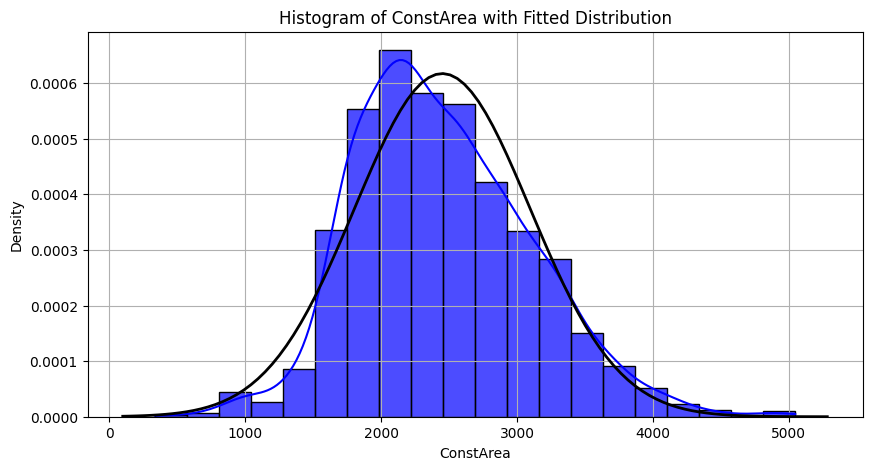

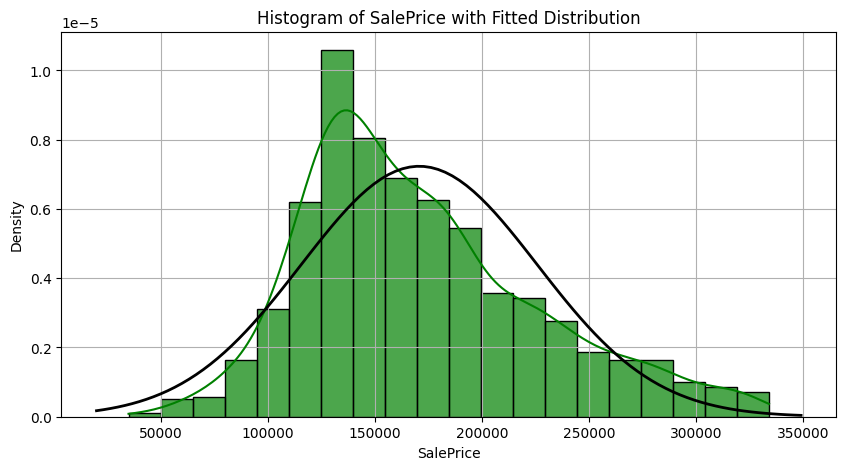

In [ ]:
from scipy.stats import norm
# Assuming X and Y are your variables in data2
# Plot histogram for X
plt.figure(figsize=(10, 5))
sns.histplot(X, kde=True, color='blue', bins=20, stat='density', alpha=0.7)

# Fit distribution line to X
mu, std = norm.fit(X)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram of ConstArea with Fitted Distribution')
plt.xlabel('ConstArea')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot histogram for Y
plt.figure(figsize=(10, 5))
sns.histplot(Y, kde=True, color='green', bins=20, stat='density', alpha=0.7)

# Fit distribution line to Y
mu, std = norm.fit(Y)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram of SalePrice with Fitted Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## b.Report the model in equation form and interpret each coefficient of the model in the context of this problem.  


**Model Equation** :SalePrice = -6210.8762 + 72.2027*ConstArea </br>
Interpretation : The coefficient 72.2027 suggests that for every one-unit increase in ConstArea, the SalePrice is expected to increase by $72.2027.</br>
 Intercept might suggest the expected SalePrice when ConstArea is zero

## c.Report and interpret the R-squared value in the context of this problem.


R-squared:  0.716  </br>
Here R-squared tells that the independent variable 'ConstArea' explains the 71.6% of the variability in dependent variable 'SalePrice'

## d.Report the coefficient and ANOVA Tables.  


In [ ]:
# Fit the multiple linear regression model
model1 = ols('Y ~ X', data=data2).fit()

# Print the ANOVA table
sm.stats.anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,3.742526e+12,3.742526e+12,4332.724453,0.0
Residual,1716.0,1.482248e+12,8.637811e+08,NaN,NaN


In [ ]:
# Fit the multiple linear regression model
model2 = ols('Y ~ X', data=data2).fit()

# Print the ANOVA table
sm.stats.anova_lm(model2,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,4.312862e+09,1.0,4.993004,0.025578
X,3.742526e+12,1.0,4332.724453,0.000000
Residual,1.482248e+12,1716.0,NaN,NaN


## e.Clearly specify the hypotheses associated with each coefficient of the model, as well as the hypothesis for the overall omnibus model.  Conduct and interpret these hypothesis tests.

In [ ]:

hypothesis_testing_regression(data2['ConstArea'], data2['SalePrice'],72.2027, res_square)


1. Step 1
Null Hypothesis :       β1 = 0 (No effect on dependent variable)
Alternate Hypothesis :  β1 ≠ 0
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals = 1482248408254.5154
Mean of x = 2450.11641443539
Mean Squared Error (MSE) = 863781123.6914425
Root Mean Squared Error (RMSE) = 29390.153515955688
4. Step 4
The value of t-statistics = 65.82344731047972
5. Step 5
p-value: 0.0
6. Step 6
Reject the Null Hypothesis


In [ ]:
omnibus_test_regression(X, Y, res_square, 1)


1. Step 1
Null Hypothesis :       β1 = β2 = ... = βk = 0 (No effect of independent variables on dependent variable)
Alternate Hypothesis :  At least one βi ≠ 0 (At least one independent variable has an effect)
2. Step 2
Alpha = 0.05
3. Step 3: Data Collection
Sum of Squared Residuals = 1482248408254.5154
Mean Squared Error (MSE) = 863781123.6914425
Root Mean Squared Error (RMSE) = 29390.153515955688
4. Step 4
The value of F-statistic = 4332.7244527356
5. Step 5
p-value: 1.1102230246251565e-16
6. Step 6
Reject the Null Hypothesis


## f.The validity of the hypothesis tests are dependent on the underlying assumptions of Independence, Normality, and Homoscedasticity being well met.  Check on these underlying assumptions by plotting:</br>  1.Histogram of the standardized residuals</br>2.Scatterplot of standardized residuals (Y) by predicted values (Y_hat)


In [ ]:
a= np.sum(res_square)
b= a/1716
c= np.sqrt(b)
c

29390.153515955688

In [ ]:
results['Std_res']= results['Residual']/c

In [ ]:
import scipy.stats as stats

# Assuming 'results' is your DataFrame and 'column' is the column for which you want to create a histogram
data = results['Std_res']

# Fit a distribution to the data
mu, std = stats.norm.fit(data)  # Fit a normal distribution
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Probability density function for the fitted normal distribution

# Create a histogram
fig = go.Figure(data=[go.Histogram(x=data, histnorm='probability density')])

# Add a line for the fitted distribution
fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name='Fitted Normal Distribution'))

# Update layout
fig.update_layout(
    title="Histogram of Standard Residuals with Fitted Normal Distribution",
    xaxis_title="Standard Residuals",
    yaxis_title="Density",
    bargap=0.1
)

# Show the plot
fig.show()

In [ ]:
# Assuming 'results' is your DataFrame containing the data
x_data = results['Predicted']  # Replace 'x_column' with the name of your x-axis column
y_data = results['Std_res']  # Replace 'y_column' with the name of your y-axis column

# Calculate the mean of y_data
mean_y = y_data.mean()

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Add a horizontal line at the mean of y_data
fig.add_shape(
    type="line",
    x0=x_data.min(),
    y0=mean_y,
    x1=x_data.max(),
    y1=mean_y,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Predicted vs Std_res with Mean Line",
    xaxis_title="Predicted",
    yaxis_title="Std_res"
)

# Show the plot
fig.show()

## g.Check on leverage, influence and outliers.  These points can be identified by several statistics such as DFFITS, Cook’s Distance, Leverage, and Influence.  Discuss any issues or concerns.  Describe what course of action should be taken.


In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Fit your regression model
model3 = sm.OLS(Y, X).fit()

# Get influence object
influence = OLSInfluence(model3)

# Obtain leverage values
leverage = influence.hat_matrix_diag

# Print leverage values
print("Leverage values:", leverage)
leverage_value = leverage[1114]
print("Leverage value:", '{:.10f}'.format(leverage_value))

Leverage values: [0.0006786  0.00028658 0.00064045 ... 0.00032108 0.00069959 0.0008137 ]
Leverage value: 0.0000101128


In [ ]:
leverage_value = leverage[233]
print("Leverage value:", '{:.10f}'.format(leverage_value))

Leverage value: 0.0023100283


In [ ]:
6/1718  # threshold for the leverage

0.0034924330616996507

In [ ]:
np.set_printoptions(suppress=True)

#create instance of influence
influence = model3.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
cooks

(array([0.00044973, 0.00012161, 0.00013731, ..., 0.00000012, 0.0004659 ,
        0.00042384]),
 array([0.98308313, 0.99120246, 0.99065213, ..., 0.99972065, 0.98278177,
        0.98357724]))

In [ ]:
cooks_df = pd.DataFrame({'Cooks_Distance': cooks[0], 'P-Value': cooks[1]})
cooks_df

,Cooks_Distance,P-Value
0,4.497297e-04,0.983083
1,1.216149e-04,0.991202
2,1.373068e-04,0.990652
3,4.807387e-03,0.944731
4,8.810376e-05,0.992512
...,...,...
1713,2.460251e-06,0.998749
1714,1.924847e-05,0.996500
1715,1.226139e-07,0.999721
1716,4.658982e-04,0.982782


In [ ]:
data2[data2['ConstArea']==334].index

Index([1114], dtype='int64')

In [ ]:
data2[data2['ConstArea']==5048].index

Index([233], dtype='int64')

In [ ]:
cooks[0][1114]

2.981239464604389e-06

In [ ]:
cooks[0][233]

0.014883594594101462

In [ ]:
def cook_distance_threshold(n):
    """
    Calculate Cook's distance threshold for decision-making in simple linear regression.

    Parameters:
        n (int): Number of observations.
        p (int): Number of predictor variables (excluding the intercept).

    Returns:
        float: Cook's distance threshold.
    """
    return 4 / (n)

# Example usage:
# Assuming you have 100 observations and 1 predictor variable
n_obs = 1718
n_predictors = 1

threshold = cook_distance_threshold(n_obs)
print("Cook's distance threshold:", threshold)

Cook's distance threshold: 0.002328288707799767


In [ ]:
data2[data2['ConstArea'] == 5048]['SalePrice']

233    278000
Name: SalePrice, dtype: int64

In [ ]:
data2['ConstArea'].max()

5048.0

In [ ]:
data2['SalePrice'].max()

334000

In [ ]:
cooks[0].max()

0.014883594594101462

In [ ]:
cooks_df[cooks_df['Cooks_Distance'] > 0.002328288707799767]

,Cooks_Distance,P-Value
3,0.004807,0.944731
13,0.006513,0.935687
19,0.005637,0.940161
23,0.003443,0.953213
30,0.004951,0.943910
...,...,...
1667,0.002712,0.958472
1676,0.008255,0.927617
1683,0.003742,0.951231
1687,0.002642,0.959016


In [ ]:
0.014883594594101462*0.5

0.007441797297050731

In [ ]:
cooks_df[cooks_df['Cooks_Distance'] > 0.014883594594101462*0.5]


,Cooks_Distance,P-Value
130,0.008324,0.927316
233,0.014884,0.902915
248,0.010178,0.919651
253,0.007491,0.931039
321,0.008129,0.928169
422,0.009848,0.920961
469,0.008432,0.926849
484,0.010458,0.918557
547,0.008306,0.927396
555,0.009196,0.923615


In [ ]:
cooks_df['Cooks_Distance'].mean()

0.0007321040693066166

In [ ]:
0.0007321040693066166*4

0.0029284162772264663

In [ ]:
0.0007321040693066166*3

0.0021963122079198495

In [ ]:
cooks_df[cooks_df['Cooks_Distance'] >0.0029284162772264663]


,Cooks_Distance,P-Value
3,0.004807,0.944731
13,0.006513,0.935687
19,0.005637,0.940161
23,0.003443,0.953213
30,0.004951,0.943910
...,...,...
1618,0.003277,0.954354
1629,0.004281,0.947841
1676,0.008255,0.927617
1683,0.003742,0.951231


In [ ]:
cooks_df[cooks_df['Cooks_Distance'] >0.0027]
 # best threshold from graph

,Cooks_Distance,P-Value
3,0.004807,0.944731
13,0.006513,0.935687
19,0.005637,0.940161
23,0.003443,0.953213
30,0.004951,0.943910
...,...,...
1660,0.002746,0.958211
1667,0.002712,0.958472
1676,0.008255,0.927617
1683,0.003742,0.951231


In [ ]:
 #Create a histogram of Cook's distance
fig = go.Figure(data=[go.Histogram(x=cooks_df['Cooks_Distance'])])

# Update layout
fig.update_layout(
    title="Histogram of Cook's Distance",
    xaxis_title="Cook's Distance",
    yaxis_title="Frequency"
)

# Show the plot
fig.show()

In [ ]:
# Calculate the mean of Cook's distance
mean_cooks_distance = cooks_df['Cooks_Distance'].mean()

# Calculate the value for the line parallel to the x-axis (4 times the mean)
line_value = 4 * mean_cooks_distance

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=cooks_df.index, y=cooks_df['Cooks_Distance'], mode='markers'))

# Add a horizontal line at 4 times the mean of Cook's distance
fig.add_shape(
    type="line",
    x0=cooks_df.index.min(),
    y0=line_value,
    x1=cooks_df.index.max(),
    y1=line_value,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Cook's Distance with Mean Line",
    xaxis_title="Row Number",
    yaxis_title="Cook's Distance"
)

# Show the plot
fig.show()

### removing influential and outliers

In [ ]:
data3 = data2.copy()

In [ ]:
# Get the indices of influential observations
influential_indices = cooks_df[cooks_df['Cooks_Distance'] > 0.0027].index

# Remove the influential observations from the original dataset
cleaned_data = data3.drop(influential_indices)

In [ ]:
# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X1 = cleaned_data['ConstArea']  # Add all your predictor variables here
Y1= cleaned_data['SalePrice']

# Fit the multiple linear regression model
model4 = sm.OLS(Y1, sm.add_constant(X1)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model4.summary())



# Print the regression equation
print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea".format(model4.params['const'], model4.params['ConstArea']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     5083.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:34:27   Log-Likelihood:                -18263.
No. Observations:                1589   AIC:                         3.653e+04
Df Residuals:                    1587   BIC:                         3.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4053.4898   2442.690     -1.659      0.0

In [ ]:
# Coefficients from the provided regression equation
b0 = -4053.4898                         #SalePrice = -6210.8762 + 72.2027*ConstArea
                                        #SalePrice = -4053.4898 + 71.0459*ConstArea
b1 = 71.0459

# Extract the required features from the dataset
ConstArea = cleaned_data['ConstArea']

# Calculate the predicted values using the regression equation
predicted_values1 = b0 + b1 * ConstArea

# Extract the actual values
actual_values1 = cleaned_data['SalePrice']

# Calculate the residuals
residuals1 = actual_values1 - predicted_values1
res_square1 = residuals1 ** 2
sum_res_square1 = np.sum(res_square)

# Create a DataFrame to hold actual, predicted, and residual values
results1 = pd.DataFrame({'Actual': actual_values1, 'Predicted': predicted_values1, 'Residual': residuals1, 'Res_Sqr': res_square1})

# Print the actual, predicted, and residual values
# print(results)


In [ ]:
# Create the scatter plot
scatter_plot = go.Scatter(x=X1, y=Y1, mode='markers', name='Data')

# Create the line plot for the regression line
regression_line = go.Scatter(x=X1, y=predicted_values1, mode='lines', line=dict(color='rgb(0, 201, 87)'), name='Regression Line without Outlier')


# Create the line plot for the new regression line
regression_line2 = go.Scatter(x=X, y=predicted_values, mode='lines', line=dict(color='rgb(255, 0, 0)'), name='Regression Line with Outlier')
# Create the figure and add the plots
fig = go.Figure(data=[scatter_plot, regression_line,regression_line2])

# Update layout
fig.update_layout(title='Scatterplot with Regression Line',
                  xaxis_title='X',
                  yaxis_title='Y')

# Show the plot
fig.show()

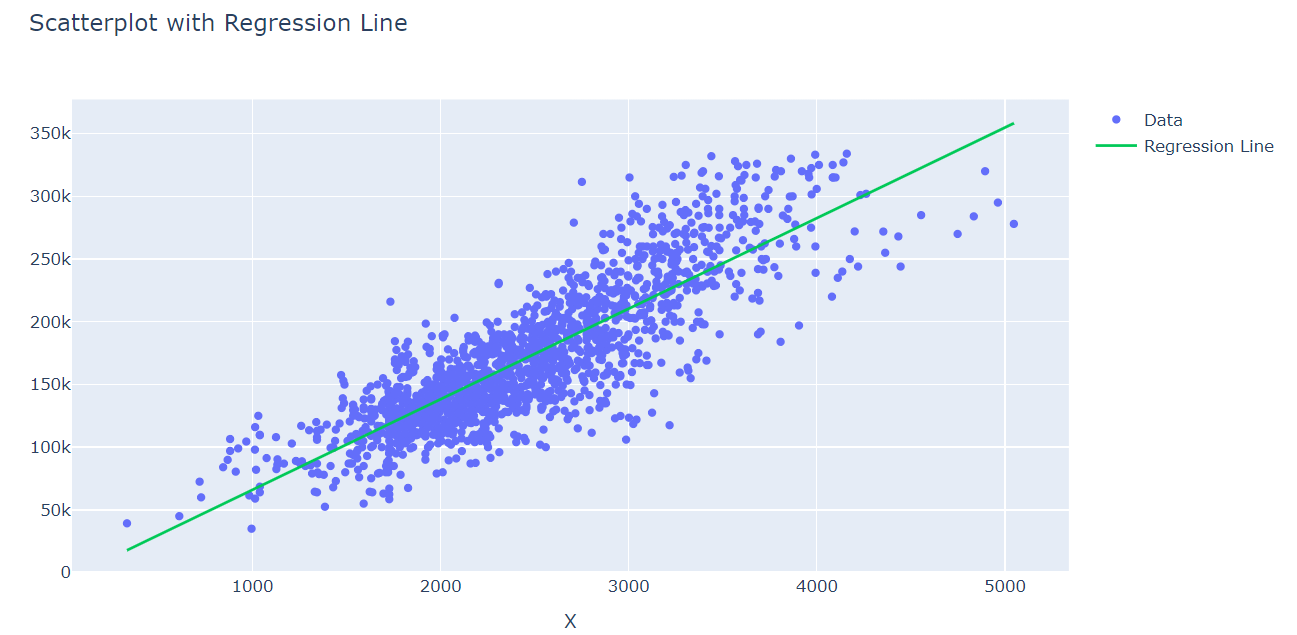

# Task 2

In [ ]:
data2['ConstArea'].corr(data2['OverallQual'])

0.6535473507836492

In [ ]:
cleaned_data['ConstArea'].corr(cleaned_data['OverallQual'])

0.6379882107944546

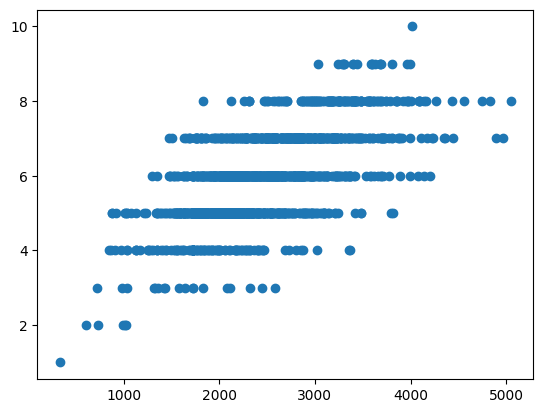

In [ ]:
plt.scatter(data2['ConstArea'],data2['OverallQual'])
plt.show()

In [ ]:

# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X2 = data2[['ConstArea','OverallQual']]  # Add all your predictor variables here
Y2= data2['SalePrice']

# Fit the multiple linear regression model
model5 = sm.OLS(Y2, sm.add_constant(X2)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model5.summary())



# Print the regression equation
print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea+ {:.4f}*OverallQual".format(model5.params['const'], model5.params['ConstArea'], model5.params['OverallQual']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3744.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:34:28   Log-Likelihood:                -19751.
No. Observations:                1718   AIC:                         3.951e+04
Df Residuals:                    1715   BIC:                         3.952e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.336e+04   2953.406    -21.453      

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# Select your features and target variable
X = data2[['OverallQual', 'ConstArea']]  # Your features
y = data2['SalePrice']  # Your target variable
# Fit the multiple linear regression model
model6 = LinearRegression().fit(X, y)

# Calculate VIF for each coefficient
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF for each coefficient
print(vif_data)

       Feature        VIF
0  OverallQual  26.327395
1    ConstArea  26.327395


In [ ]:
# Coefficients from the provided regression equation
b0 = -63359.1471
b1 = 49.2186
b2 = 19104.9396

# Extract the required features from the dataset
ConstArea = data2['ConstArea']
OverallQual = data2['OverallQual']

# Calculate the predicted values using the regression equation
predicted_values2 = b0 + b1 * ConstArea + b2 * OverallQual

# Extract the actual values
actual_values2 = data2['SalePrice']

# Calculate the residuals
residuals2 = actual_values2 - predicted_values2
res_square2 = residuals2 ** 2
sum_res_square2 = np.sum(res_square)
MSE2= sum_res_square2/1716
RMSE2 = np.sqrt(MSE2)

# Create a DataFrame to hold actual, predicted, and residual values
results2 = pd.DataFrame({'Actual': actual_values2, 'Predicted': predicted_values2, 'Residual': residuals2, 'Res_Sqr': res_square2})
print(RMSE2)
# Print the actual, predicted, and residual values
# print(results)


29390.153515955688


In [ ]:
# Define the data for plotting
x_data = data2['ConstArea']
y_data = data2['OverallQual']
z_data = data2['SalePrice']  # Target variable

# Create a meshgrid for the surface plot
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range = np.linspace(min(y_data), max(y_data), 100)
X, Y = np.meshgrid(x_range, y_range)
Z = b0 + b1 * X + b2 * Y  # Calculate the predicted values for the surface plot

# Calculate the predicted values for the regression line
regression_line = b0 + b1 * x_data + b2 * y_data

# Create the scatter plot for the data points
scatter = go.Scatter3d(x=x_data, y=y_data, z=z_data, mode='markers', name='Data Points', marker=dict(size=5))

# Create the surface plot for the regression plane
surface = go.Surface(x=x_range, y=y_range, z=Z, name='Regression Plane')

# Create the line plot for the regression line
line = go.Scatter3d(x=x_data, y=y_data, z=regression_line, mode='lines', name='Regression Line', line=dict(color='red', width=4))

# Create the layout for the 3D plot
layout = go.Layout(
    title='3D Plot with Regression Plane and Line',
    scene=dict(
        xaxis=dict(title='ConstArea'),
        yaxis=dict(title='OverallQual'),
        zaxis=dict(title='SalePrice')
    )
)

# Create the figure and add the scatter plot, surface plot, and line plot
fig = go.Figure(data=[scatter, surface, line], layout=layout)

# Show the plot
fig.show()

Ridge regression

In [ ]:
# # Select your features and target variable
# X = data2[['OverallQual', 'ConstArea']]  # Your features
# y = data2['SalePrice']  # Your target variable

# # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Ridge regression model
# ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength by changing alpha

# # Fit the model to the training data
# ridge.fit(X, y)

# # Make predictions on the testing data
# y_pred = ridge.predict(X)


# # Calculate the mean squared error
# mse = mean_squared_error(y, y_pred)
# print("Mean Squared Error:", mse)
# print("Previous model MSE = ",sum_res_square1 )
# # Print the coefficients
# print("Coefficients:")
# for feature, coef in zip(X.columns, ridge.coef_):     #SalePrice = -63359.1471 + 49.2186*ConstArea+ 19104.9396*OverallQual

#     print(feature, ":", coef)

In [ ]:
# 1482248408254.5154-566704411.3936608

## a.Report the prediction equation and interpret each coefficient of the model in the context of this problem.  Is there something different about the coefficient interpretations here relative to the simple linear regression model in Task 1?

SalePrice=-63359.1471 + 49.2186*ConstArea+ 19104.9396*OverallQual


**Intercept Term (-63359.1471)**:
Represents the estimated value of SalePrice when both predictor variables are zero.</br>
**Coefficient for ConstArea (49.2186)**:
Indicates that for every unit increase in ConstArea, the SalePrice is estimated to increase by 49.2186, holding all other variables constant.</br>
**Coefficient for OverallQual (19104.9396):**
Indicates that for every unit increase in OverallQual, the SalePrice is estimated to increase by 19104.9396, holding all other variables constant.

## b.Report and interpret the R-squared value in the context of this problem.  Calculate and report the difference in R-squared between Model 2 and Model 1.  Interpret this difference.

R-squared: 0.814

Model 1 R- squared: 0.716 </br>
Difference in R-squared=0.098  </br>

**Interpretation:**

The difference in R-squared between Model 2 and Model 1 is 0.098.
This suggests that Model 2 explains 9.8% more variance in the dependent variable compared to Model 1.
In other words, the additional variables or features included in Model 2 account for an additional 9.8% of the variability in the target variable compared to Model 1.

## c.Report the coefficient and ANOVA Tables.

In [ ]:
# Fit the multiple linear regression model
model7 = ols('Y2 ~ X2', data=data2).fit()

# Print the ANOVA table
sm.stats.anova_lm(model7)

,df,sum_sq,mean_sq,F,PR(>F)
X2,2.0,4.251176e+12,2.125588e+12,3744.239208,0.0
Residual,1715.0,9.735979e+11,5.676956e+08,NaN,NaN


In [ ]:
# Fit the multiple linear regression model
model8 = ols('SalePrice ~ ConstArea + OverallQual', data=data2).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model8, typ=3)

anova_table


,sum_sq,df,F,PR(>F)
Intercept,2.612690e+11,1.0,460.227287,1.236884e-90
ConstArea,9.962696e+11,1.0,1754.936286,9.734820e-265
OverallQual,5.086505e+11,1.0,895.991637,9.711794e-159
Residual,9.735979e+11,1715.0,NaN,NaN


## d.Specify the hypotheses associated with each coefficient of the model and the hypothesis for the overall omnibus model.  Conduct and interpret these hypothesis tests.

In [ ]:
from scipy.stats import t

def hypothesis_testing_multi_regression1(coef, x, p):
    n = len(x)
    summary = model3.summary()
    # Extract coefficients and standard errors from the summary table
    coef_data = summary.tables[1].data  # Extract table data for coefficients and standard errors

    # Coefficients are typically in the first column and standard errors in the second column
    coefficients = [float(row[1]) for row in coef_data[1:]]  # Skip the first row as it contains headers
    std_errors = [float(row[2]) for row in coef_data[1:]]

    std_error = None  # Initialize std_error
    for i in range(len(coefficients)):
        if coefficients[i] == coef:
            std_error = std_errors[i]  # Update std_error if coefficient matches

    if std_error is None:
        print(f"Error: Coefficient {coef} not found in model summary.")
        return

    # Step 1: State the Null Hypothesis and Alternative Hypothesis
    print("1. Step 1")
    print("Null Hypothesis: β = 0 (No effect on dependent variable) for all i")
    print("Alternative Hypothesis: β ≠ 0")

    # Step 2: Set α
    print("2. Step 2")
    alpha = 0.05
    print("Alpha =", alpha)

    # Step 3: Collect Data
    print("3. Step 3: Data Collection")
    print("Coefficient =", coef)
    print("Standard error =", std_error)

    # Step 4: Calculate test statistics for each coefficient
    print("4. Step 4")
    t_statistic = coef / std_error
    print(f"t-statistic for coefficient =: {t_statistic}")

    # Step 5: Construct Acceptance / Rejection regions
    # Degrees of freedom
    df = n - p - 1

    # Calculate p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
    print(f"p-value for coefficient :", p_value)

    # Step 6: Based on steps 5 and 6, draw a conclusion about H0
    if p_value < alpha:
        print(f"Reject the Null Hypothesis for coefficient {coef}")
    else:
        print(f"Fail to reject Null Hypothesis for coefficient {coef}")

# Example usage:
# hypothesis_testing_multi_regression1(coef_value, x_data, p_value)
#SalePrice = -63359.1471 + 49.2186*ConstArea+ 19104.9396*OverallQual


In [ ]:
# hypothesis_testing_multi_regression(53.3140,data['ConstArea'],2)
hypothesis_testing_multi_regression1(49.2186,data2['ConstArea'],2)

Error: Coefficient 49.2186 not found in model summary.


In [ ]:
hypothesis_testing_multi_regression1(1.91e+04 ,data2['OverallQual'],2)

Error: Coefficient 19100.0 not found in model summary.


## e.The validity of the hypothesis tests are dependent on the underlying assumptions of Independence, Normality, and Homoscedasticity being well met.  Check on these underlying assumptions by plotting:  </br>Histogram of the standardized residuals </br>Scatterplot of standardized residuals (Y) by predicted values (Y_hat)  </br>Discuss any deviations from normality or patterns in the residuals that indicate      heteroscedasticity.


In [ ]:
results2['std_res']=results['Residual']/RMSE2

In [ ]:
import scipy.stats as stats

# Assuming 'results' is your DataFrame and 'column' is the column for which you want to create a histogram
data = results2['std_res']

# Fit a distribution to the data
mu, std = stats.norm.fit(data)  # Fit a normal distribution
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Probability density function for the fitted normal distribution

# Create a histogram
fig = go.Figure(data=[go.Histogram(x=data, histnorm='probability density')])

# Add a line for the fitted distribution
fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name='Fitted Normal Distribution'))

# Update layout
fig.update_layout(
    title="Histogram of Standard Residuals with Fitted Normal Distribution",
    xaxis_title="Standard Residuals",
    yaxis_title="Density",
    bargap=0.1
)

# Show the plot
fig.show()

In [ ]:
# Assuming 'results' is your DataFrame containing the data
x_data = results2['Predicted']  # Replace 'x_column' with the name of your x-axis column
y_data = results2['std_res']  # Replace 'y_column' with the name of your y-axis column

# Calculate the mean of y_data
mean_y = y_data.mean()

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Add a horizontal line at the mean of y_data
fig.add_shape(
    type="line",
    x0=x_data.min(),
    y0=mean_y,
    x1=x_data.max(),
    y1=mean_y,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Predicted vs Std_res with Mean Line",
    xaxis_title="Predicted",
    yaxis_title="Std_res"
)

# Show the plot
fig.show()

In [ ]:
# Assuming 'results' is your DataFrame containing the data
x_data = results2['Predicted']  # Replace 'x_column' with the name of your x-axis column
y_data = results2['Residual']  # Replace 'y_column' with the name of your y-axis column

# Calculate the mean of y_data
mean_y = y_data.mean()

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Add a horizontal line at the mean of y_data
fig.add_shape(
    type="line",
    x0=x_data.min(),
    y0=mean_y,
    x1=x_data.max(),
    y1=mean_y,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Predicted vs residual with Mean Line",
    xaxis_title="Predicted",
    yaxis_title="Residuals"
)

# Show the plot
fig.show()

## f.Check on leverage, influence and outliers, and discuss any issues or concerns.

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
X2 = data2[['ConstArea','OverallQual']]  # Add all your predictor variables here
Y2= data2['SalePrice']
# Fit your regression model
model9 = sm.OLS(Y2, X2).fit()

# Get influence object
influence = OLSInfluence(model9)

# Obtain leverage values
leverage = influence.hat_matrix_diag

# Print leverage values
print("Leverage values:", leverage)
# leverage_value = leverage[1114]
# print("Leverage value:", '{:.10f}'.format(leverage_value))

Leverage values: [0.00075035 0.00057541 0.00066286 ... 0.00046537 0.00165572 0.00081394]


In [ ]:
9/1718

0.005238649592549476

In [ ]:
6/1718

0.0034924330616996507

In [ ]:
np.where(leverage > 0.005238649592549476)

(array([ 151,  233,  256,  269,  468,  478,  621,  693,  781,  861,  923,
         948,  963,  984, 1079, 1343, 1351, 1408, 1540, 1587, 1696]),)

In [ ]:
np.set_printoptions(suppress=True)

#create instance of influence
influence = model9.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

# #display Cook's distances
# cooks

cooks_df1 = pd.DataFrame({'Cooks_Distance': cooks[0], 'P-Value': cooks[1]})
cooks_df1

,Cooks_Distance,P-Value
0,4.148505e-04,0.999585
1,3.068708e-04,0.999693
2,5.827115e-05,0.999942
3,1.586091e-03,0.998415
4,3.249302e-04,0.999675
...,...,...
1713,8.804044e-05,0.999912
1714,5.340740e-07,0.999999
1715,9.617926e-06,0.999990
1716,8.304684e-05,0.999917


In [ ]:
 #Create a histogram of Cook's distance
fig = go.Figure(data=[go.Histogram(x=cooks_df1['Cooks_Distance'])])

# Update layout
fig.update_layout(
    title="Histogram of Cook's Distance",
    xaxis_title="Cook's Distance",
    yaxis_title="Frequency"
)

# Show the plot
fig.show()

In [ ]:
cooks_df1['Cooks_Distance'].mean()

0.0006768644522106629

In [ ]:
0.0006768644522106629*4


0.0027074578088426516

In [ ]:
cooks_df1['Cooks_Distance'].max()

0.018986569204306566

In [ ]:
cooks_df1[cooks_df1['Cooks_Distance'] > 0.0027074578088426516]

,Cooks_Distance,P-Value
13,0.004757,0.995254
19,0.003381,0.996625
23,0.004732,0.995279
25,0.002719,0.997285
30,0.003523,0.996484
...,...,...
1676,0.012607,0.987472
1683,0.002783,0.997221
1687,0.004089,0.995919
1696,0.007934,0.992097


### removing influential

In [ ]:
data4= data2.copy()

In [ ]:
# Get the indices of influential observations
influential_indices = cooks_df[cooks_df['Cooks_Distance'] > 0.0027].index

# Remove the influential observations from the original dataset
cleaned_data1 = data4.drop(influential_indices)

In [ ]:

# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X2 = cleaned_data1[['ConstArea','OverallQual']]  # Add all your predictor variables here
Y2= cleaned_data1['SalePrice']

# Fit the multiple linear regression model
model10 = sm.OLS(Y2, sm.add_constant(X2)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model10.summary())



# Print the regression equation
print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea+ {:.4f}*OverallQual".format(model10.params['const'], model10.params['ConstArea'], model10.params['OverallQual']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3905.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:38:09   Log-Likelihood:                -17991.
No. Observations:                1589   AIC:                         3.599e+04
Df Residuals:                    1586   BIC:                         3.600e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.836e+04   2693.778    -17.954      

In [ ]:
# Coefficients from the provided regression equation
b0 = -63359.1471
b1 = 49.2186
b2 = 19104.9396

# Extract the required features from the dataset
ConstArea = cleaned_data1['ConstArea']
OverallQual = cleaned_data1['OverallQual']

# Calculate the predicted values using the regression equation
predicted_values3 = b0 + b1 * ConstArea + b2 * OverallQual

# Extract the actual values
actual_values3 = cleaned_data1['SalePrice']

# Calculate the residuals
residuals3 = actual_values3 - predicted_values3
res_square3 = residuals3 ** 2
# sum_res_square2 = np.sum(res_square2)
# MSE2 = sum_res_square2 / 1716
# RMSE2 = np.sqrt(MSE2)

# Create a DataFrame to hold actual, predicted, and residual values
results3 = pd.DataFrame({'Actual': actual_values3, 'Predicted': predicted_values3, 'Residual': residuals3, 'Res_Sqr': res_square3})
# print(RMSE2)


In [ ]:
# Define the data for plotting
x_data = cleaned_data1['ConstArea']
y_data = cleaned_data1['OverallQual']
z_data = cleaned_data1['SalePrice']  # Target variable

# Create a meshgrid for the surface plot
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range = np.linspace(min(y_data), max(y_data), 100)
X, Y = np.meshgrid(x_range, y_range)
Z = b0 + b1 * X + b2 * Y  # Calculate the predicted values for the surface plot

# Calculate the predicted values for the regression line
regression_line = b0 + b1 * x_data + b2 * y_data

# Create the scatter plot for the data points
scatter = go.Scatter3d(x=x_data, y=y_data, z=z_data, mode='markers', name='Data Points', marker=dict(size=5))

# Create the surface plot for the regression plane
surface = go.Surface(x=x_range, y=y_range, z=Z, name='Regression Plane')

# Create the line plot for the regression line
line = go.Scatter3d(x=x_data, y=y_data, z=regression_line, mode='lines', name='Regression Line', line=dict(color='red', width=4))

# Create the layout for the 3D plot
layout = go.Layout(
    title='3D Plot with Regression Plane and Line',
    scene=dict(
        xaxis=dict(title='ConstArea'),
        yaxis=dict(title='OverallQual'),
        zaxis=dict(title='SalePrice')
    )
)

# Create the figure and add the scatter plot, surface plot, and line plot
fig = go.Figure(data=[scatter, surface, line], layout=layout)

# Show the plot
fig.show()

# Task 3

In [ ]:
correlation_dict = {}

# Calculate correlation between each numerical feature and SalePrice
for column in data2.select_dtypes(include=['int', 'float']).columns:
    correlation = data2[column].corr(data2['SalePrice'])
    correlation_dict[column] = correlation

# Sort the correlation dictionary by values in descending order
sorted_correlation = sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted correlation values
for item in sorted_correlation:
    print(f'Correlation between {item[0]} and SalePrice is = {item[1]}')


Correlation between SalePrice and SalePrice is = 1.0
Correlation between ConstArea and SalePrice is = 0.8463473421066878
Correlation between OverallQual and SalePrice is = 0.789288008965684
Correlation between GarageCars and SalePrice is = 0.6545388921081666
Correlation between TotalFullBath and SalePrice is = 0.648721332044344
Correlation between GarageArea and SalePrice is = 0.6142656826048202
Correlation between TotRmsAbvGrd and SalePrice is = 0.6047014544433901
Correlation between FirstFlrSF and SalePrice is = 0.6009690809304085
Correlation between YearRemodel and SalePrice is = 0.5206367143064949
Correlation between Price_sqft and SalePrice is = 0.502410807077153
Correlation between Fireplaces and SalePrice is = 0.47727097032002985
Correlation between MasVnrArea and SalePrice is = 0.44236710610518554
Correlation between SecondFlrSF and SalePrice is = 0.38140950578664123
Correlation between BsmtFinSF1 and SalePrice is = 0.3539664348251966
Correlation between LotFrontage and SalePri

In [ ]:
data2['GarageCars'].corr(data2['ConstArea'])

0.5379613310822486

In [ ]:
data2['GarageCars'].corr(data2['OverallQual'])

0.5598507985845015

In [ ]:
data2['GarageArea'].corr(data2['ConstArea'])

0.5142192134383717

In [ ]:
data2['GarageArea'].corr(data2['OverallQual'])

0.49280339805245915

In [ ]:

# Assuming 'target_column' is the column you want to predict, and 'feature_columns' are the predictor variables
X2 = data2[['ConstArea','OverallQual','GarageArea']]  # Add all your predictor variables here
Y2= data2['SalePrice']

# Fit the multiple linear regression model
model11 = sm.OLS(Y2, sm.add_constant(X2)).fit()

# Get predictions
# predictions = model.predict(X)

# Get the summary of the regression model
print(model11.summary())



# Print the regression equation
print("Regression Equation:")
print("SalePrice = {:.4f} + {:.4f}*ConstArea+ {:.4f}*OverallQual +  {:.4f}*GarageArea".format(model11.params['const'], model11.params['ConstArea'], model11.params['OverallQual'], model11.params['GarageArea']))


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2841.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:19:04   Log-Likelihood:                -19659.
No. Observations:                1718   AIC:                         3.933e+04
Df Residuals:                    1714   BIC:                         3.935e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.127e+04   2804.393    -21.848      

In [ ]:
# Coefficients from the provided regression equation
b0 = -61270.9467
b1 = 44.4910
b2 = 17010.0318
b3 = 48.4484

# Extract the required features from the dataset
ConstArea = data2['ConstArea']
OverallQual = data2['OverallQual']
GarageArea = data2['GarageArea']

# Calculate the predicted values using the regression equation
predicted_values4 = b0 + b1 * ConstArea + b2 * OverallQual + b3 * GarageArea

# Extract the actual values
actual_values4= data2['SalePrice']

# Calculate the residuals
residuals4 = actual_values4 - predicted_values4
res_square4 = residuals4 ** 2

# Calculate the mean squared error (MSE)
MSE4 = np.mean(res_square4)
print("Mean Squared Error (MSE):", MSE4)

# Calculate the root mean squared error (RMSE)
RMSE4 = np.sqrt(MSE4)
print("Root Mean Squared Error (RMSE):", RMSE4)

# Create a DataFrame to hold actual, predicted, and residual values
results4 = pd.DataFrame({'Actual': actual_values4, 'Predicted': predicted_values4, 'Residual': residuals4, 'Res_Sqr': res_square4})


Mean Squared Error (MSE): 509200520.21223694
Root Mean Squared Error (RMSE): 22565.471858843033


## e.Check on the underlying assumptions.   Discuss any deviations from normality or patterns in the residuals that indicate heteroscedasticity.

In [ ]:
results4['std_res'] = results4['Residual']/RMSE4

In [ ]:
import scipy.stats as stats

# Assuming 'results' is your DataFrame and 'column' is the column for which you want to create a histogram
data = results4['std_res']

# Fit a distribution to the data
mu, std = stats.norm.fit(data)  # Fit a normal distribution
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Probability density function for the fitted normal distribution

# Create a histogram
fig = go.Figure(data=[go.Histogram(x=data, histnorm='probability density')])

# Add a line for the fitted distribution
fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name='Fitted Normal Distribution'))

# Update layout
fig.update_layout(
    title="Histogram of Standard Residuals with Fitted Normal Distribution",
    xaxis_title="Standard Residuals",
    yaxis_title="Density",
    bargap=0.1
)

# Show the plot
fig.show()

In [ ]:
# Assuming 'results' is your DataFrame containing the data
x_data = results4['Predicted']  # Replace 'x_column' with the name of your x-axis column
y_data = results4['std_res']  # Replace 'y_column' with the name of your y-axis column

# Calculate the mean of y_data
mean_y = y_data.mean()

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Add a horizontal line at the mean of y_data
fig.add_shape(
    type="line",
    x0=x_data.min(),
    y0=mean_y,
    x1=x_data.max(),
    y1=mean_y,
    line=dict(
        color="red",
        width=3,
        dash="dashdot",
    ),
)

# Update layout
fig.update_layout(
    title="Scatter Plot of Predicted vs Std_res with Mean Line",
    xaxis_title="Predicted",
    yaxis_title="Std_res"
)

# Show the plot
fig.show()

## f.Check on leverage, influence and outliers, and discuss any issues or concerns.